# Importing, Manipulating, and Writing Point Clouds

The most basic operations of LiDAR analysis involve importing and inspecting tiles of LiDAR data. This sample demonstrates basic file input, plotting, filtering and output using `pyfor`.

## Importing Point Clouds

In [1]:
import pyfor

The first step after importing in most workflows is to instantiate a Cloud object. This can be done by calling the cloud.Cloud class on a las or laz file path. The instance of the Cloud class holds all methods and data related to the raw point cloud, some of which we will explore below.

In [2]:
tile = pyfor.cloud.Cloud("data/test.las")

Once we have an instance of our Cloud object we can explore some information regarding the point cloud. The header information, for example, is stored in the .las.header attribute. We can access that information thusly:

In [3]:
print("Number of points: %d" % tile.las.header.count)

Number of points: 2912035


In [4]:
tile.las.header.max

[405999.99, 3276999.99, 945.36]

In [5]:
tile.las.header.min

[405000.0, 3276227.86, -238.43]

The point cloud itself is organized in a `pandas` dataframe. Those familiar with the `pandas` package will be right at home here.

In [6]:
tile.las.points.head()

,classification,flag_byte,intensity,pt_src_id,scan_angle_rank,user_data,x,y,z
0,2,9,5,9,13,0,405961.34,3276236.02,24.57
1,1,9,1,9,13,5,405962.14,3276236.03,25.05
2,2,9,1,9,13,0,405967.66,3276235.89,24.76
3,1,9,1,9,13,0,405968.37,3276235.88,24.76
4,2,9,1,9,12,0,405979.79,3276235.63,24.77


We can use any `pandas` functionality from this data frame that we desire. If we want to examine the distribution of the `z` dimension, we can do so:

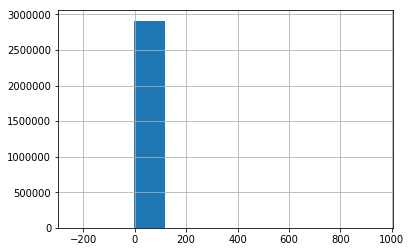

In [7]:
tile.las.points["z"].hist()

Looks like we have some outliers that need to be removed! This can be done using the `.filter()` method, explored in detail below.

## Filtering Points

Point clouds can be filtered along any dimension. As a reminder, we can find a list of the dimensions using pandas functionality:

In [8]:
list(tile.las.points)

['classification',
 'flag_byte',
 'intensity',
 'pt_src_id',
 'scan_angle_rank',
 'user_data',
 'x',
 'y',
 'z']

To filter we use the `.filter()` method of a cloud object. We must provide a dimension and the bounds owe wish to filter. Note that this modifies the cloud object **in place**.

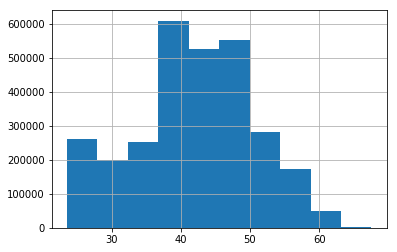

In [9]:
tile.filter(min=0, max=70, dim="z")
tile.las.points["z"].hist()

## Plotting the Point Cloud

This is all fine and good, but what about point cloud visualization? There are many options for this in pyfor. The most basic plot is a 2 dimensional canopy height model using the `.plot` method of our `tile`.

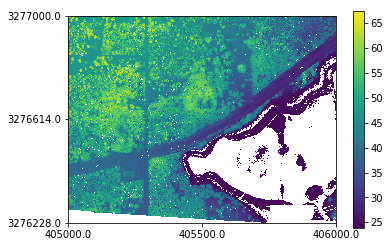

In [10]:
tile.plot()

If we prefer 3D visualizations, we can do so in Jupyter notebooks with the `.iplot3d` method.

In [17]:
tile.iplot3d(point_size=4, colorscale = "Viridis")

<img src="images/basic_plot.png" width="550">

If you are running from the console, a simple `.plot3d` will suffice (shown here below for reference, this method does not work in Jupyter (yet!)).

In [ ]:
tile.plot3d(point_size=2)

<img src="images/regular_plot.png" width="550">

## Writing to File

Now that we have modified our tile by removing outliers in the Z dimension, we want to save our work. This is done with the `.write` method.

In [ ]:
tile.write("filtered_tile.las")